In [3]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
# 데이터 로드
heart_d = pd.read_csv('heart_2020_cleaned.csv')

# 중복 제거
heart_d = heart_d.drop_duplicates()
heart_d

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


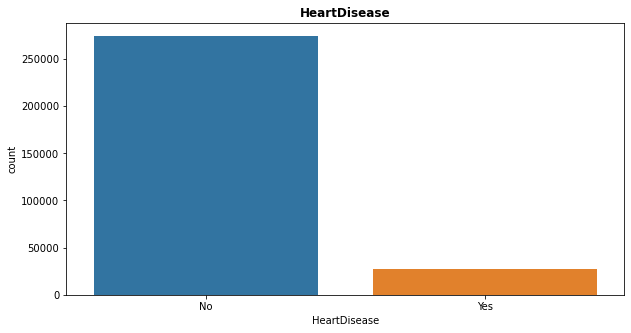

In [5]:
# 변수별 시각화
plt.figure(figsize=(10,5)) 

g = sns.countplot(x=heart_d['HeartDisease'])
g.set_title('HeartDisease', fontweight='bold')
plt.show()

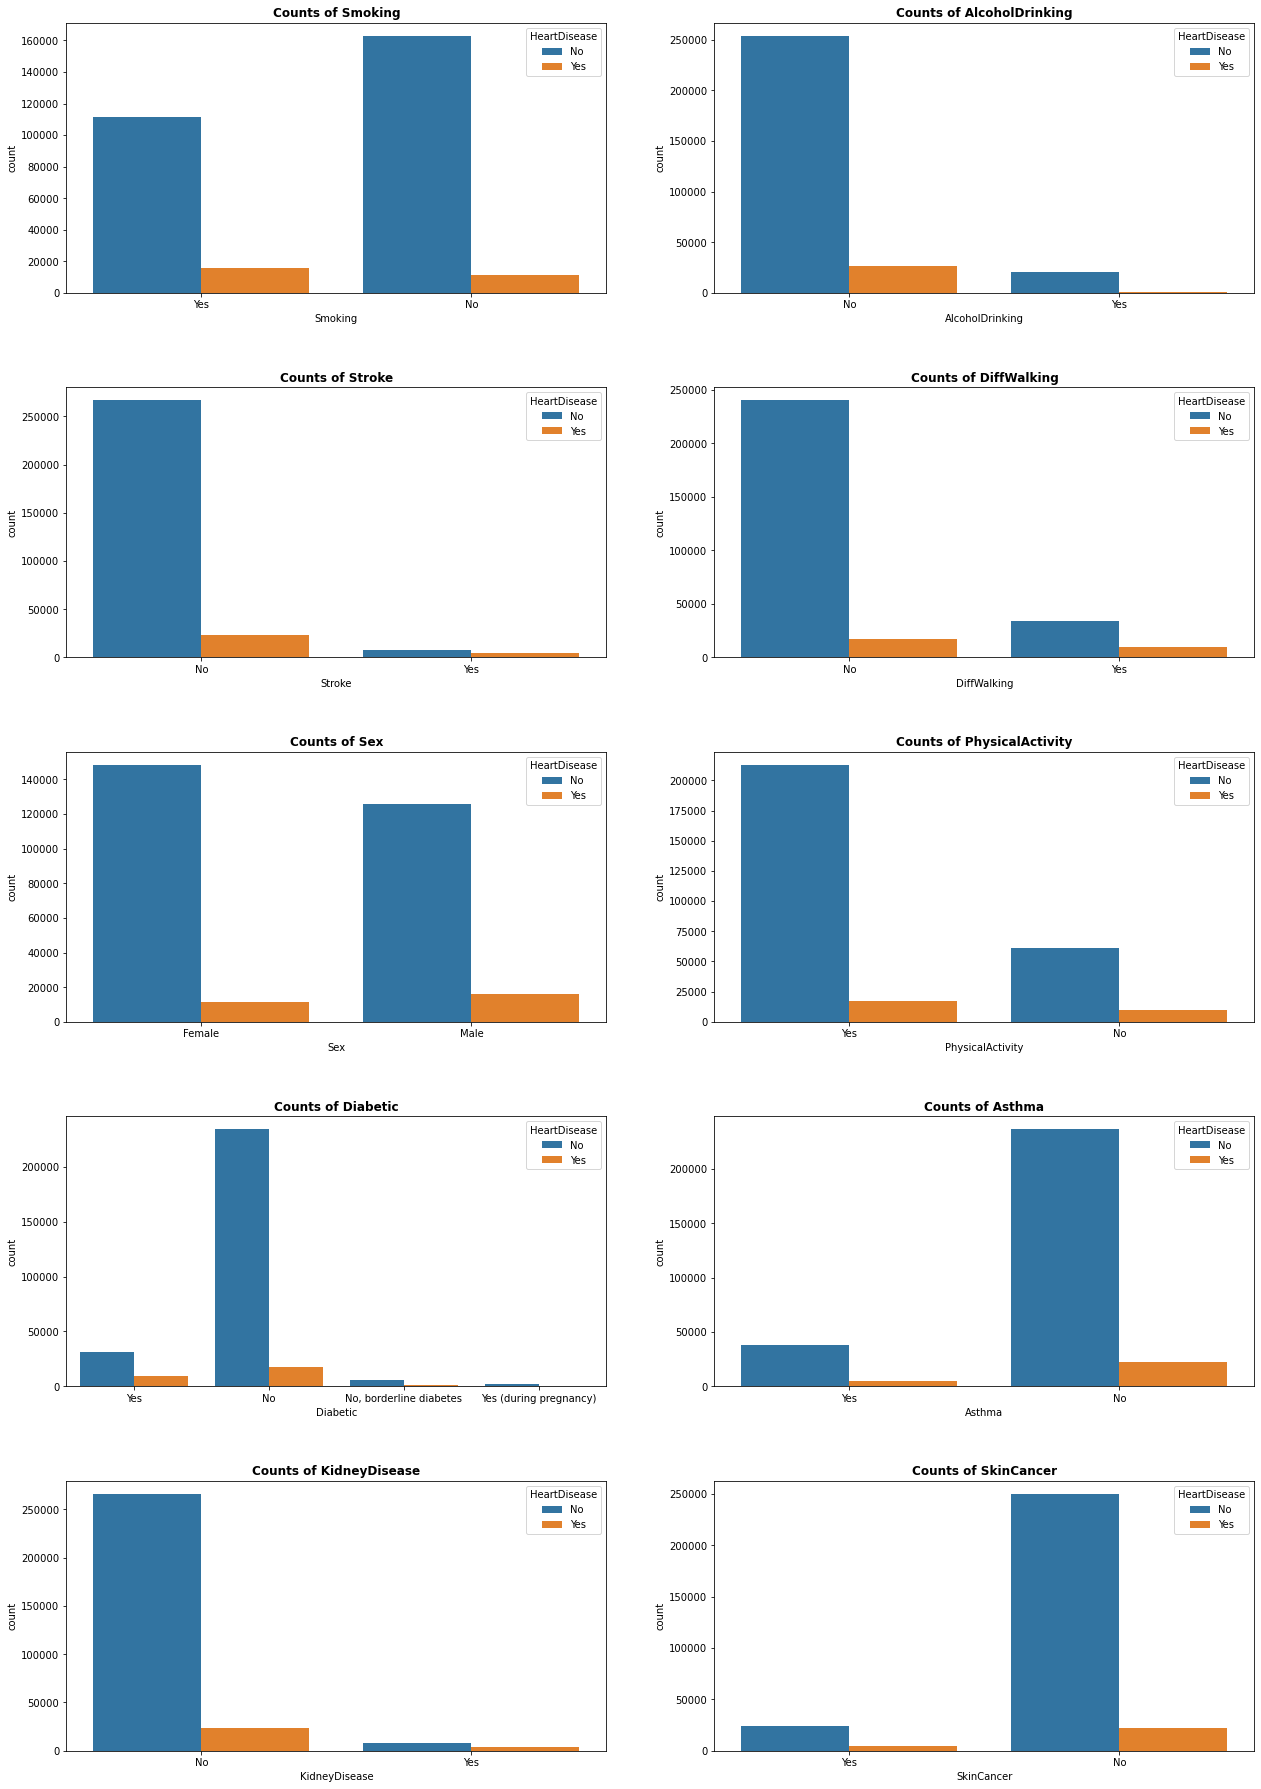

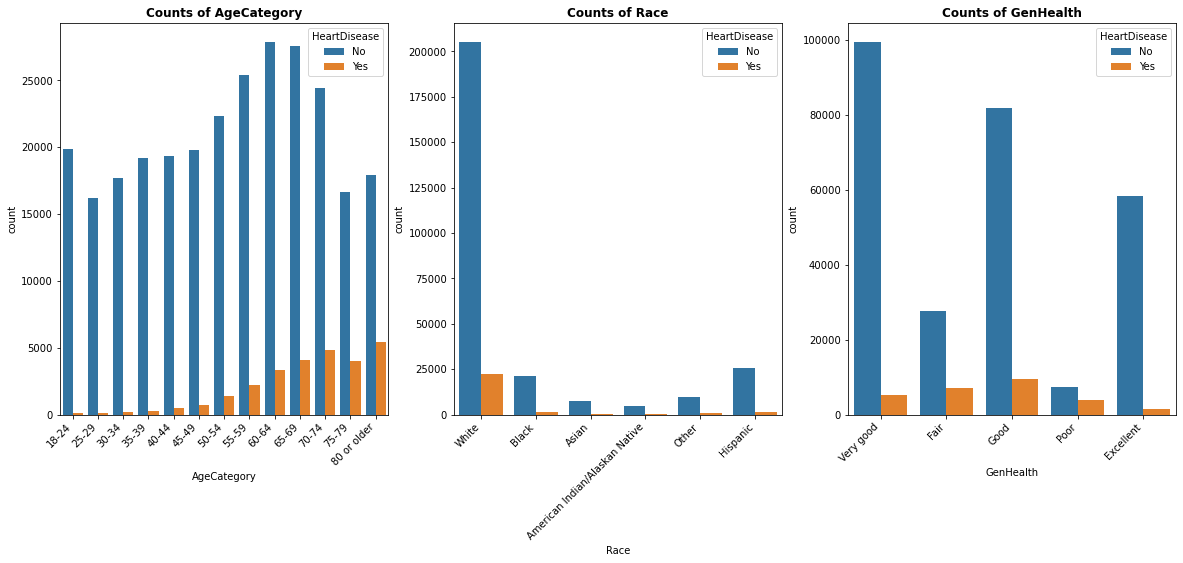

In [6]:
range_col_name1 = [['Smoking','AlcoholDrinking'],['Stroke','DiffWalking'],['Sex','PhysicalActivity'],['Diabetic','Asthma'],['KidneyDisease','SkinCancer']]

heart_d['AgeCategory'] = pd.Categorical(heart_d['AgeCategory'], ordered=True)
range_col_name2 = [['AgeCategory','Race','GenHealth']]

def printCount(cols_name):
    fig, axes = plt.subplots(5, 2, figsize=(20, 30))
    row=0
    col=0
    for row in range(5):
        for col in range(2):
            plt.subplots_adjust(left=0.075, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
            column = cols_name[row][col]
            sns.countplot(ax=axes[row,col],x=heart_d[column],hue=heart_d['HeartDisease'])
            axes[row,col].set_title("Counts of {}".format(column), fontweight='bold')
            
def printCount_2(cols_name):
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    row=0
    col=0
    for row in range(1):
        for col in range(3):
            column = cols_name[row][col]
            sns.countplot(ax=axes[col],x=heart_d[column],hue=heart_d['HeartDisease'])
            axes[col].set_title("Counts of {}".format(column), fontweight='bold')
            fig.autofmt_xdate(rotation=45)

printCount(range_col_name1)
printCount_2(range_col_name2)

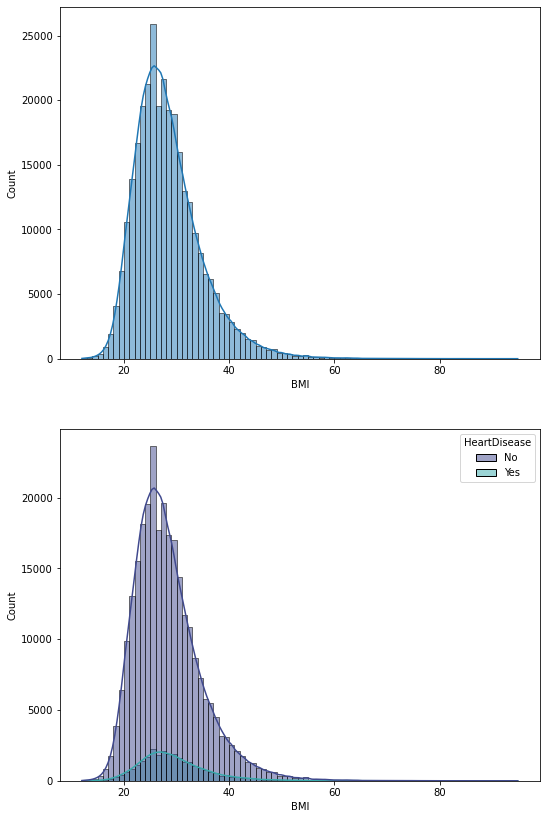

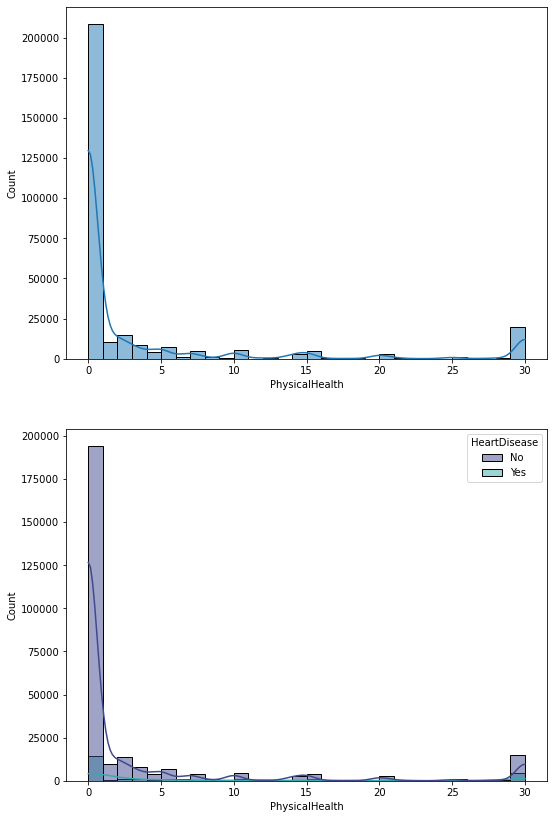

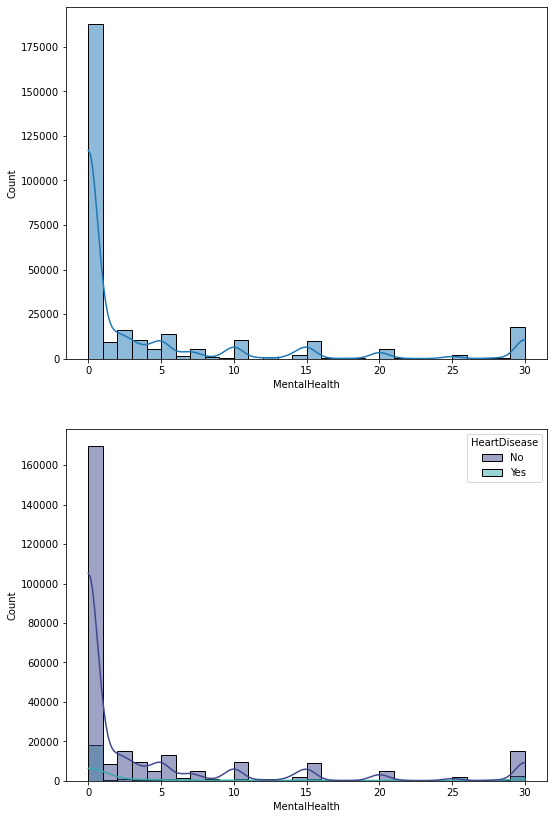

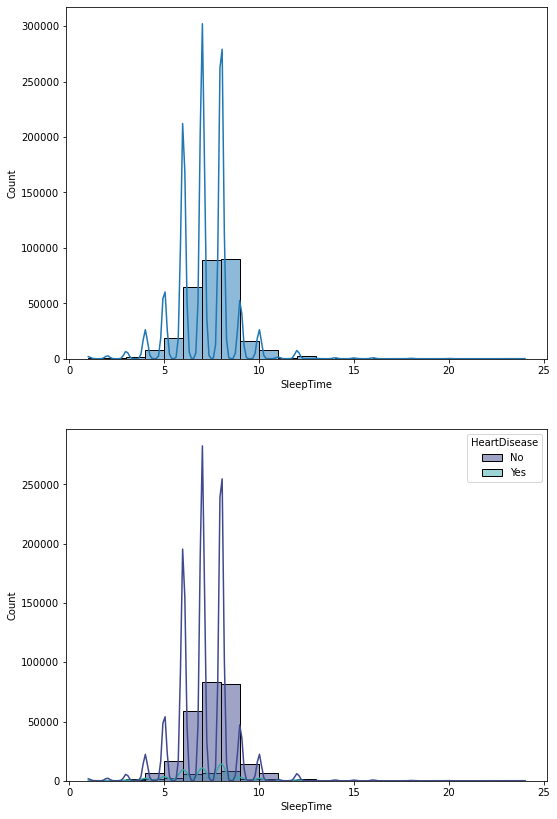

In [7]:
col_name = [['BMI','PhysicalHealth'],['MentalHealth', 'SleepTime']]

def printCount__(cols_name):

    row=0
    col=0
    
    for row in range(2): 
        for col in range(2):
            plt.figure(figsize=(18,22))
            ax= [None for _ in range(2)]

            ax[0] = plt.subplot2grid((3,4), (0,0), colspan = 2)
            ax[1] = plt.subplot2grid((3,4), (1,0), colspan = 2)
            
            column = cols_name[row][col]
            sns.histplot(data= heart_d, x = heart_d[column],palette='mako',alpha = 0.5 ,binwidth = 1,kde = True, ax=ax[0])
            sns.histplot(data= heart_d, x = heart_d[column],palette='mako',alpha = 0.5 ,binwidth = 1,kde = True, ax=ax[1],hue = 'HeartDisease')

printCount__(col_name)

In [5]:
heart_one_hot = heart_d.copy()
heart_one_hot['AgeCategory'].value_counts()

heart_one_hot_race = heart_one_hot.copy()
heart_one_hot_race = pd.get_dummies(heart_one_hot['Race'])

heart_one_hot = heart_one_hot.drop(['Race'], axis='columns')

In [6]:
# one-hot-encoding
y_n = {"Yes":1, "No":0}
diabetic = {"Yes":2, "Yes (during pregnancy)":2, "No, borderline diabetes":1, "No":0}
sex = {"Female": 0, "Male":1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
age = {"18-24":20, "25-29":25, "30-34":30, "35-39":35, "40-44":40, "45-49":45, "50-54":50, "55-59":55, "60-64":60, "65-69":65, "70-74":70, "75-79":75, "80 or older":80}

heart_one_hot["Smoking"] = heart_one_hot["Smoking"].replace(y_n)
heart_one_hot["AlcoholDrinking"] = heart_one_hot["AlcoholDrinking"].replace(y_n)
heart_one_hot["Stroke"] = heart_one_hot["Stroke"].replace(y_n)
heart_one_hot["DiffWalking"] = heart_one_hot["DiffWalking"].replace(y_n)
heart_one_hot["PhysicalActivity"] = heart_one_hot["PhysicalActivity"].replace(y_n)
heart_one_hot["Asthma"] = heart_one_hot["Asthma"].replace(y_n)
heart_one_hot["KidneyDisease"] = heart_one_hot["KidneyDisease"].replace(y_n)
heart_one_hot["HeartDisease"] = heart_one_hot["HeartDisease"].replace(y_n)
heart_one_hot["SkinCancer"] = heart_one_hot["SkinCancer"].replace(y_n)
heart_one_hot["Diabetic"] = heart_one_hot["Diabetic"].replace(diabetic)
heart_one_hot["Sex"] = heart_one_hot["Sex"].replace(sex)
heart_one_hot["GenHealth"] = heart_one_hot["GenHealth"].replace(health_map)
heart_one_hot["AgeCategory"] = heart_one_hot["AgeCategory"].replace(age)

heart_one_hot = pd.concat([heart_one_hot,heart_one_hot_race], axis=1)

heart_one_hot

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,...,12.0,0,0,0,0,0,0,1,0,0


In [7]:
x = heart_one_hot.iloc[:,1:]
y = heart_one_hot.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

# 모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    metrics(y_test,pred)
    
# 평가
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    matrix = confusion_matrix(y_test, pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')

    print('Accuracy: ', format(accuracy,'.2f'),'\n')
    print('Recall: ', format(recall,'.2f'),'\n')
    print('Precision: ', format(precision,'.2f'),'\n')
    print('F1_score: ', format(f1,'.2f'),'\n')
    print('Roc_score: ', format(roc_score,'.2f'),'\n')
    print('Confusion Matrix:','\n', matrix)

In [8]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,x_train,x_test,y_train,y_test)

Accuracy:  0.91 

Recall:  0.10 

Precision:  0.50 

F1_score:  0.17 

Roc_score:  0.55 

Confusion Matrix: 
 [[54306   543]
 [ 4944   551]]


In [9]:
smote = SMOTE(random_state=0)
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

print('SMOTE 적용 전: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후: ', x_train_s.shape, y_train_s.shape)
print('SMOTE 적용 후 0/1 값 분포: \n', pd.Series(y_train_s).value_counts())
modeling(lgb,x_train_s,x_test,y_train_s,y_test)

Accuracy:  0.86 

Recall:  0.35 

Precision:  0.27 

F1_score:  0.30 

Roc_score:  0.63 

Confusion Matrix: 
 [[49700  5149]
 [ 3595  1900]]


In [ ]:
svmsmote = SVMSMOTE(random_state=0)
x_train_svm,y_train_svm = svmsmote.fit_resample(x_train,y_train)

modeling(lgb,x_train_svm,x_test,y_train_svm,y_test)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE 
bsmote = BorderlineSMOTE(random_state=42)

x_train_b,y_train_b = bsmote.fit_resample(x_train,y_train)

print('SMOTE 적용 전: ', x_train.shape, y_train.shape)
print('SMOTE 적용 후: ', x_train_b.shape, y_train_b.shape)
print('SMOTE 적용 후 0/1 값 분포: \n', pd.Series(y_train_b).value_counts())

modeling(lgb,x_train_b,x_test,y_train_b,y_test)